### Fourier Transform

- Fourier Transform transforms a time-domain graph to frequency-domain graph
- Compare signal (each amplitude) with sinusoids of various frequencies
- For each frequency, we get a **magnitude** and a **phase**
- High magnitude indicates high similarity between the signal and a sinusoid



### Import Libraries

In [9]:
%matplotlib inline
import scipy as sp
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

### Load Audio

In [10]:
audio_file = "./audio/test.wav"
claps, sr = librosa.load(audio_file)

print(f"Sample rate:                      {sr} samples per second")
print(f"Number of total samples of audio: {len(claps)} samples")
print(f"Duration of audio file:           {len(claps) / sr} seconds")
print(f"Duration of one sample:           {1 / sr:.6f} seconds")

Sample rate:                      22050 samples per second
Number of total samples of audio: 110250 samples
Duration of audio file:           5.0 seconds
Duration of one sample:           0.000045 seconds


### Visualise the waveform (Time-Domain)

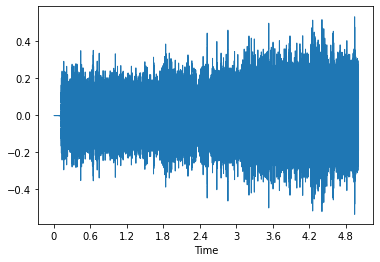

In [12]:
librosa.display.waveshow(claps)
plt.show()

### Get the Fourier Transform

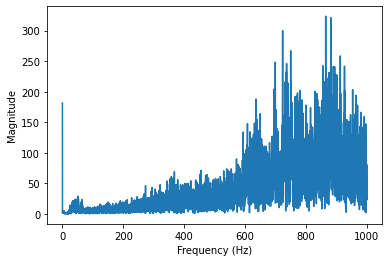

In [26]:
ft = sp.fft.fft(claps)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

# plot the spectrum
# plt.figure(figsize=(18,8))
plt.plot(frequency[:5000], magnitude[:5000])
# plt.plot(frequency, magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

### Zooming in to the waveform

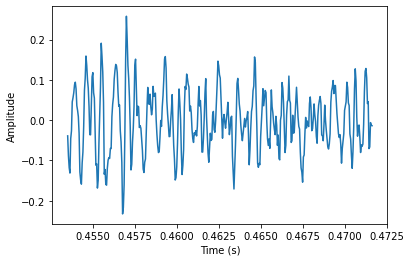

In [27]:
samples = range(len(claps))
t = librosa.samples_to_time(samples, sr=sr)

# plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], claps[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### Creating a sinusoid (Comparing different phases)

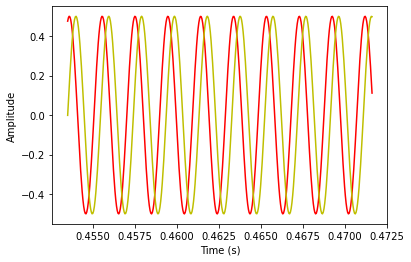

In [29]:
f = 512 # frequency
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

# plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], sin[10000:10400], color='r')
plt.plot(t[10000:10400], sin2[10000:10400], color='y')

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### Afterwards, compare signal and sinusoids